# Medidas de tendência central

Uma medida de tendência central é um valor que representa uma observação típica ou central de um conjunto de dados. As três medidas da tendência central mais comumente usadas são a **média, a mediana e a moda**.

- <a href='#s1'>Média</a>
- <a href='#s2'>Mediana</a>
- <a href='#s3'>Moda</a>
- <a href='#s4'>Outliers</a>
- <a href='#s5'>Média ponderada</a>
- <a href='#s6'>Média de distribuição de frequência</a>

In [2]:
import numpy as np

<a id='s1'></a>

---

### Média

A média de um conjunto de dados é a soma dos valores dos dados dividida pelo número de observações. 

Ex: Dado o conjunto de valores 2, 4, 6, 8, 10, 12, vamos encontrar a média.

- O primeiro passo é somar todos os valores: 2 + 4 + 6 + 8 + 10 + 12 = 42
- Depois basta dividir o total encontrado, pela quantidade de observações, nesse caso, 6.
- 42 / 6 = 7, logo, a média desse conjunto de dados é 7

In [4]:
lista = [2, 4, 6, 8, 10, 12]
print(lista)

[2, 4, 6, 8, 10, 12]


Uma maneira de calcular a média, é simplesmente aplicar as funções `sum` e `len` nas listas, e dividir:

In [7]:
sum(lista) / len(lista)

7.0

Outra forma mais rápida ainda, é usando o método `mean` do numpy.

In [8]:
np.mean(lista)

7.0

In [12]:
np.array([2, 4, 6, 8, 10, 12]).mean()

7.0

<a id='s2'></a>

---

### Mediana


A mediana de um conjunto de dados é um valor que está no meio dos dados quando o conjunto está ordenado. A mediana indica o centro de um conjunto de dados ordenado, dividindo-o em duas partes com quantidades iguais de valores. 

Quando o conjunto de dados tem um número ímpar de observações, a mediana é o elemento do meio. Se o conjunto de dados tem um número par de observações, a mediana é a média dos dois elementos que ocupam as posições central.

Dados os valores `5,8,4,6,7,3,4`

Precisamos ordená-los num rol: `3,4,4,5,6,7,8`

Se a quantidade de valores for **ímpar**, pegamos o valor do meio, se for **par**, somamos os dois valores centrais e dividimos por 2.

No exemplo temos 7 valores, ou seja, `Md=5` 

In [14]:
lista_2 = np.array([5,8,4,6,7,3,4])
print(np.median(lista_2))

5.0


Agora vamos num rol com quantidade par: `0,4,5,6,7,7,8,10`

* `Md = 7 + 6 / 2 = 6,5` 

In [15]:
lista_3 = np.array([0,4,5,6,7,7,8,10])
print(np.median(lista_3))

6.5


<a id='s3'></a>

---

### Moda

A moda de um conjunto de dados é o valor que ocorre com a maior frequência. Um conjunto de dados pode ter uma moda, mais de uma moda, ou não ter moda. Quando nenhum valor se repete, o conjunto de dados não tem moda.  

Quando dois valores ocorrem com a mesma maior frequência, cada um é uma moda e o conjunto é chamado de bimodal.

Na mesma lista do exemplo anterior, `0,4,5,6,7,7,8,10`, vemos que o valor que mais se repete é o 7 (2 vezes),  e essa é nossa moda.

Por alguma razão, o numpy não calcula a moda, mas, o scipy faz o trabalho.

In [17]:
from scipy import stats

In [22]:
stats.mode(lista_3)

ModeResult(mode=array([7]), count=array([2]))

O primeiro valor é o número com mais ocorrências, e o segundo valor, a quantidade de vezes em que ele aparece.

<a id='s4'></a>

---

### Outliers

Embora a média, a mediana e a moda descrevam, cada uma, um valor típico de um conjunto de dados, há vantagens e desvantagens em seus usos. 

A média é uma medida mais usual e confiável, pois leva em conta cada elemento de um conjunto de dados. Contudo, a média pode ser muito afetada quando o conjunto de dados contém valores discrepantes (outliers).

Um **outlier** é um valor que está muito afastado dos demais valores do conjunto de dados

Enquanto alguns outliers são dados válidos, outros podem ocorrer por causa de erros no registro dos dados. Um conjunto de dados pode ter um ou mais outliers, causando lacunas em uma distribuição. As conclusões que são tomadas de um conjunto de dados que contém outliers podem ser falhas.

Qual das medidas de tendência central melhor descreve o conjunto de dados abaixo?

`20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 22, 22, 22, 23, 23, 23, 23, 24, 24, 65`

In [23]:
idade_alunos = np.array([20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 22, 22, 22, 23, 23, 23, 23, 24, 24, 65])

In [29]:
print('Média: ', np.mean(idade_alunos))
print('Mediana: ', np.median(idade_alunos))
print('Moda: ', stats.mode(idade_alunos)[0][0])

Média:  23.75
Mediana:  21.5
Moda:  20


A média leva em consideração todos os valores, mas é influenciada pelo outlier de valor 65. A mediana também leva em consideração todos os valores, e não é afetada pelo outlier. Nesse caso, a moda existe, mas não parece representar um valor típico (região central).

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

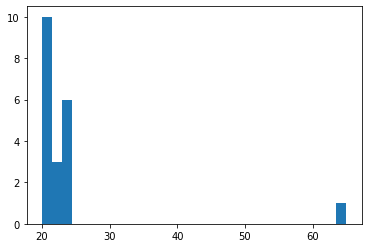

In [37]:
plt.hist(idade_alunos, bins=30);

Jogando no gráfico de histograma, vemos o valor 65 largado lá no canto direito, este é o outlier. E como ele influencia na média, jogando ela para cima, nos parece melhor usar a mediana para representar o conjunto de dados. 

<a id='s5'></a>

---

### Média ponderada

Uma média ponderada é a média de um conjunto de dados cujos valores têm pesos variados.

Nesse exemplo, vamos calcular a média ponderada de 5 provas, onde cada uma delas tem um peso diferente na nota final.

Prova | Nota, x | Peso, w | x * w
-|-|-|-|
P1 | 86 | 0,50 | 43
P2 | 96 | 0,15 | 14,4
P3 | 82 | 0,20 | 16,4
P4 | 98 | 0,10 | 9,8
P5 | 100 | 0,05 | 5,0
-| -| 1 | 88,6

Aqui multiplicamos cada nota por cada peso e anotamos seu resultado. No final, somamos todos os valores de `x * w` e teremos a média ponderada.

In [39]:
import pandas as pd

In [40]:
notas_pesos = [[86, 0.5],[96, 0.15],[82, 0.2],[98, 0.1], [100, 0.05]]

df_notas_pesos = pd.DataFrame(notas_pesos, columns=['Nota', 'Peso'])
df_notas_pesos

,Nota,Peso
0,86,0.50
1,96,0.15
2,82,0.20
3,98,0.10
4,100,0.05


Por sorte, no numpy há um jeito simples de calcular isso, com o método `average` que recebe os valores a serem calculados, e seus pesos.

In [41]:
np.average(df_notas_pesos['Nota'], weights=df_notas_pesos['Peso'])

88.6